In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# citipy module to determine city based on latitude and longitude.
from citipy import citipy
# datetime module for date format
from datetime import datetime
import requests 
# Import the API key.
from config import weather_api_key

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

kalamare bw
cape town za
prince albert ca
qaanaaq gl
saint-philippe re
atuona pf
niefern-oschelbronn de
avarua ck
torbay ca
taolanaro mg
yumen cn
punta arenas cl
new norfolk au
new norfolk au
kijang id
hasaki jp
bengkulu id
hobart au
torbay ca
el dovio co
barrow us
cabo san lucas mx
hermanus za
ulaanbaatar mn
isangel vu
bredasdorp za
kamalia pk
thompson ca
cabo san lucas mx
mananjary mg
atuona pf
bluff nz
rikitea pf
minggang cn
puerto ayora ec
lebu cl
zelenoborsk ru
marcona pe
la romana do
ventspils lv
kapaa us
sarangani ph
taunggyi mm
botshabelo za
tiksi ru
cape town za
vao nc
shumskiy ru
presidencia roque saenz pena ar
ushuaia ar
tuktoyaktuk ca
makakilo city us
nikolskoye ru
barentsburg sj
talnakh ru
kapaa us
qaanaaq gl
bambous virieux mu
busselton au
new norfolk au
portree gb
saint-philippe re
new norfolk au
port elizabeth za
oum hadjer td
rognan no
khatanga ru
jamestown sh
busselton au
arcata us
mataura pf
bluff nz
birin dz
hobart au
fortuna us
taolanaro mg
pevek ru
rikitea pf
sask

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
#len(city_data)


# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# counters are initialized at 1 so the first iteration of the 
# logging for each recorder response starts at 1
### correct method for loop
# loop through all cities in list
for i, city in enumerate(cities):
    # group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # create an endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kalamare
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | prince albert
Processing Record 4 of Set 1 | qaanaaq
Processing Record 5 of Set 1 | saint-philippe
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | niefern-oschelbronn
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | torbay
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | yumen
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | kijang
Processing Record 15 of Set 1 | hasaki
Processing Record 16 of Set 1 | bengkulu
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | el dovio
Processing Record 19 of Set 1 | barrow
Processing Record 20 of Set 1 | cabo san lucas
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | ulaanbaat

Processing Record 37 of Set 4 | pisco
Processing Record 38 of Set 4 | bonfim
Processing Record 39 of Set 4 | yaan
Processing Record 40 of Set 4 | ballina
Processing Record 41 of Set 4 | severo-kurilsk
Processing Record 42 of Set 4 | tasiilaq
Processing Record 43 of Set 4 | castro
Processing Record 44 of Set 4 | progreso
Processing Record 45 of Set 4 | naze
Processing Record 46 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 47 of Set 4 | mapimi
Processing Record 48 of Set 4 | platanos
Processing Record 49 of Set 4 | touros
Processing Record 50 of Set 4 | port lincoln
Processing Record 1 of Set 5 | adrar
Processing Record 2 of Set 5 | jinchang
Processing Record 3 of Set 5 | bulungu
Processing Record 4 of Set 5 | paita
Processing Record 5 of Set 5 | aksu
Processing Record 6 of Set 5 | suntar
Processing Record 7 of Set 5 | lorengau
Processing Record 8 of Set 5 | lata
Processing Record 9 of Set 5 | cabedelo
Processing Record 10 of Set 5 | mahebourg
Processing Record 11 of 

In [10]:
# Convert array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
new_city_data_df = city_data_df[new_column_order]
new_city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kalamare,BW,2021-07-31 16:03:34,-22.9337,26.5703,60.89,25,0,6.91
1,Cape Town,ZA,2021-07-31 16:03:34,-33.9258,18.4232,64.35,71,80,1.99
2,Prince Albert,CA,2021-07-31 16:03:35,53.2001,-105.7677,76.89,33,0,4.05
3,Qaanaaq,GL,2021-07-31 16:03:35,77.4840,-69.3632,42.62,85,56,2.66
4,Saint-Philippe,RE,2021-07-31 16:03:36,-21.3585,55.7679,71.19,74,49,16.49
5,Atuona,PF,2021-07-31 16:03:36,-9.8000,-139.0333,76.46,73,34,12.12
6,Niefern-Oschelbronn,DE,2021-07-31 16:01:56,48.9167,8.7833,78.12,56,66,9.51
7,Avarua,CK,2021-07-31 16:03:37,-21.2078,-159.7750,73.45,78,75,16.11
8,Torbay,CA,2021-07-31 16:03:21,47.6666,-52.7314,72.37,77,75,28.77
9,Yumen,CN,2021-07-31 16:03:38,40.2833,97.2000,81.93,17,84,28.74


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

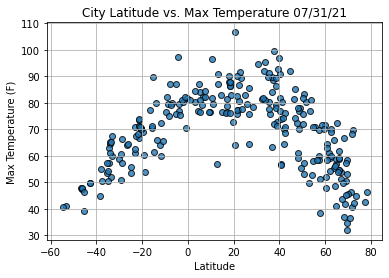

In [13]:
# import time module
import time

# build scatter plot for lat vs. max temp
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# show plot
plt.show()

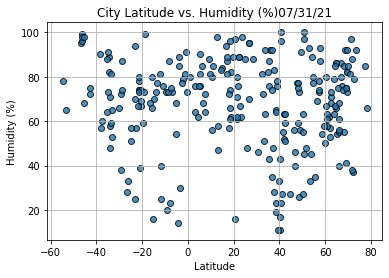

In [14]:
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity (%)"+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# show plot
plt.show()

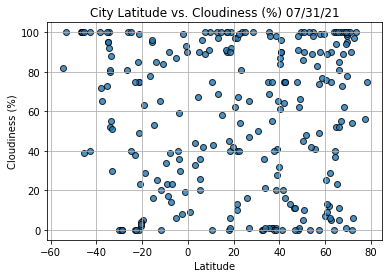

In [15]:
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# show plot
plt.show()

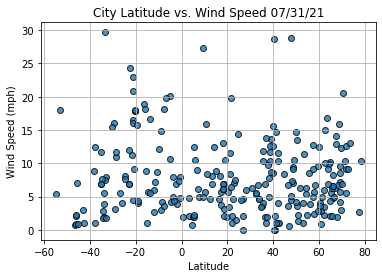

In [16]:
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# show plot
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
# Call function with parameters (5)
#row = df.loc[row_index]
index13 = city_data_df.loc[13]
index13

City                       Hasaki
Lat                       35.7333
Lng                      140.8333
Max Temp                     75.6
Humidity                       92
Cloudiness                     98
Wind Speed                  11.86
Country                        JP
Date          2021-07-31 16:02:05
Name: 13, dtype: object

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Prince Albert,53.2001,-105.7677,76.89,33,0,4.05,CA,2021-07-31 16:03:35
3,Qaanaaq,77.4840,-69.3632,42.62,85,56,2.66,GL,2021-07-31 16:03:35
6,Niefern-Oschelbronn,48.9167,8.7833,78.12,56,66,9.51,DE,2021-07-31 16:01:56
8,Torbay,47.6666,-52.7314,72.37,77,75,28.77,CA,2021-07-31 16:03:21
9,Yumen,40.2833,97.2000,81.93,17,84,28.74,CN,2021-07-31 16:03:38
...,...,...,...,...,...,...,...,...,...
248,Jacmel,18.2342,-72.5347,87.69,61,1,6.20,HT,2021-07-31 16:06:19
251,Rangapara,26.8167,92.6500,75.81,95,65,2.04,IN,2021-07-31 16:06:21
252,Rong Kwang,18.3390,100.3174,76.26,96,90,3.09,TH,2021-07-31 16:06:22
253,Enkoping,59.6361,17.0777,70.21,58,99,2.89,SE,2021-07-31 16:06:22


In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Prince Albert,53.2001,-105.7677,76.89,33,0,4.05,CA,2021-07-31 16:03:35
3,Qaanaaq,77.4840,-69.3632,42.62,85,56,2.66,GL,2021-07-31 16:03:35
6,Niefern-Oschelbronn,48.9167,8.7833,78.12,56,66,9.51,DE,2021-07-31 16:01:56
8,Torbay,47.6666,-52.7314,72.37,77,75,28.77,CA,2021-07-31 16:03:21
9,Yumen,40.2833,97.2000,81.93,17,84,28.74,CN,2021-07-31 16:03:38


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

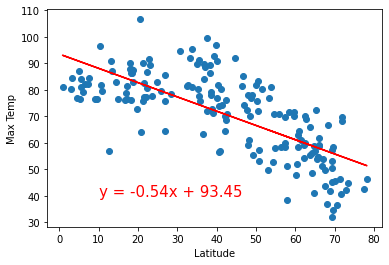

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

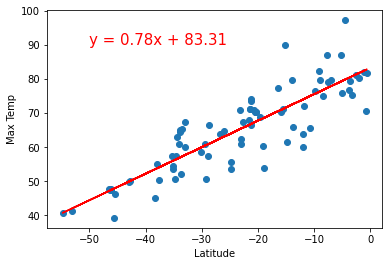

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

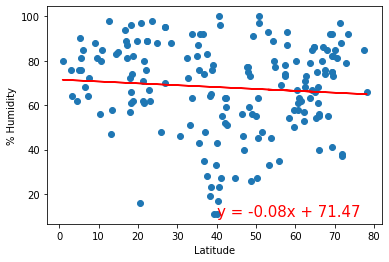

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

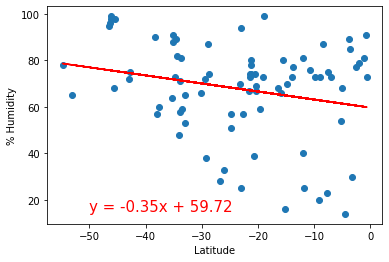

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

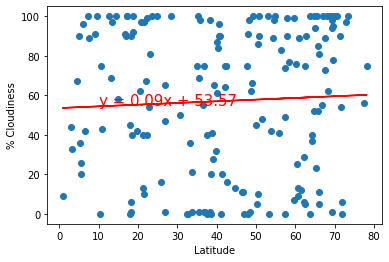

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   "Linear Regression on the Northern Hemisphere \
                    for % Cloudiness", "% Cloudiness",(10,55))

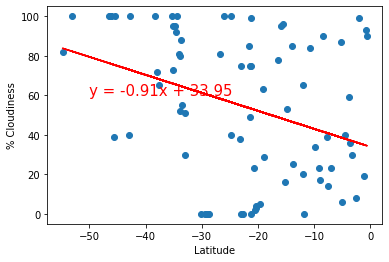

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

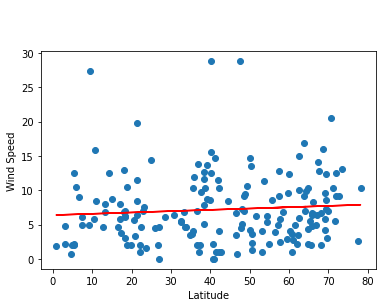

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))


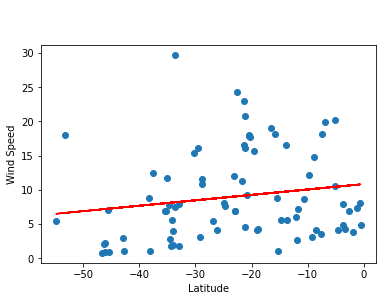

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))